# In this workbook we will explore creating charts using Matplotlib using the health dataset available on Kaggle
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

[Anatomy of a figure](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)

![image](image.png)


# Color selector
https://matplotlib.org/stable/gallery/color/named_colors.html

https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading the datase**t

In [47]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

Observe the dataset
- head
- shape
- info
- isna
- describe

In [48]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [40]:
data.shape

(374, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [42]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [43]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Scatter plot

### Scatter plot with vertical and horizontal lines

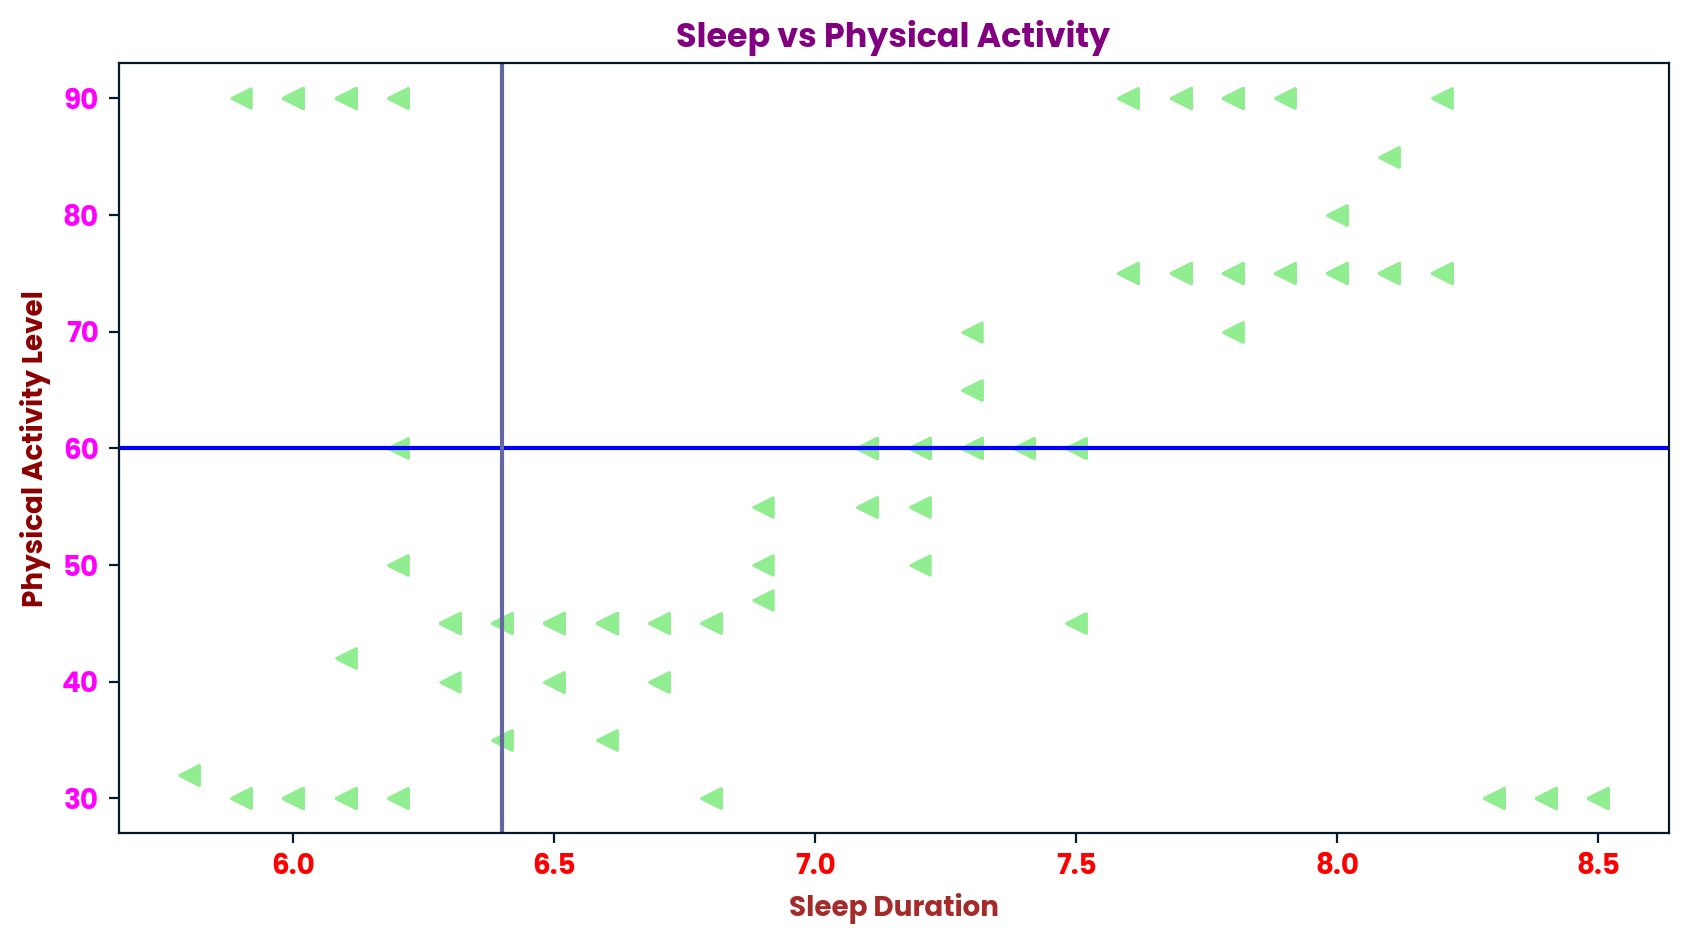

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.gca().set_facecolor("white")

plt.scatter(data['Sleep Duration'], data['Physical Activity Level'], 
            color=["lightgreen"],
            marker="<", alpha=1, s=50)

# giving title to the plot
plt.title("Sleep vs Physical Activity", fontweight="bold", color="purple")

# giving X and Y labels
plt.xlabel("Sleep Duration", fontweight="bold", color="brown")
plt.ylabel("Physical Activity Level", fontweight="bold", color="darkred")

# Modifying the ticks
plt.xticks(rotation=0, color="red", fontweight="bold")
plt.yticks(color="magenta", fontweight="bold")

# Adding lines
plt.axhline(y=data["Physical Activity Level"].median(), color='b', linestyle='-')
#plt.hlines(y=80, xmin="Nurse", xmax = "Lawyer") # Other way to add a horizontal line
plt.axvline(x=data["Sleep Duration"].quantile(0.25))
#plt.vlines("Doctor", ymin=0, ymax=100) # Other way to add a vertical line

# visualizing the plot
plt.show()

### Modification of plot to add labels for selected points, vertical and horizontal lines

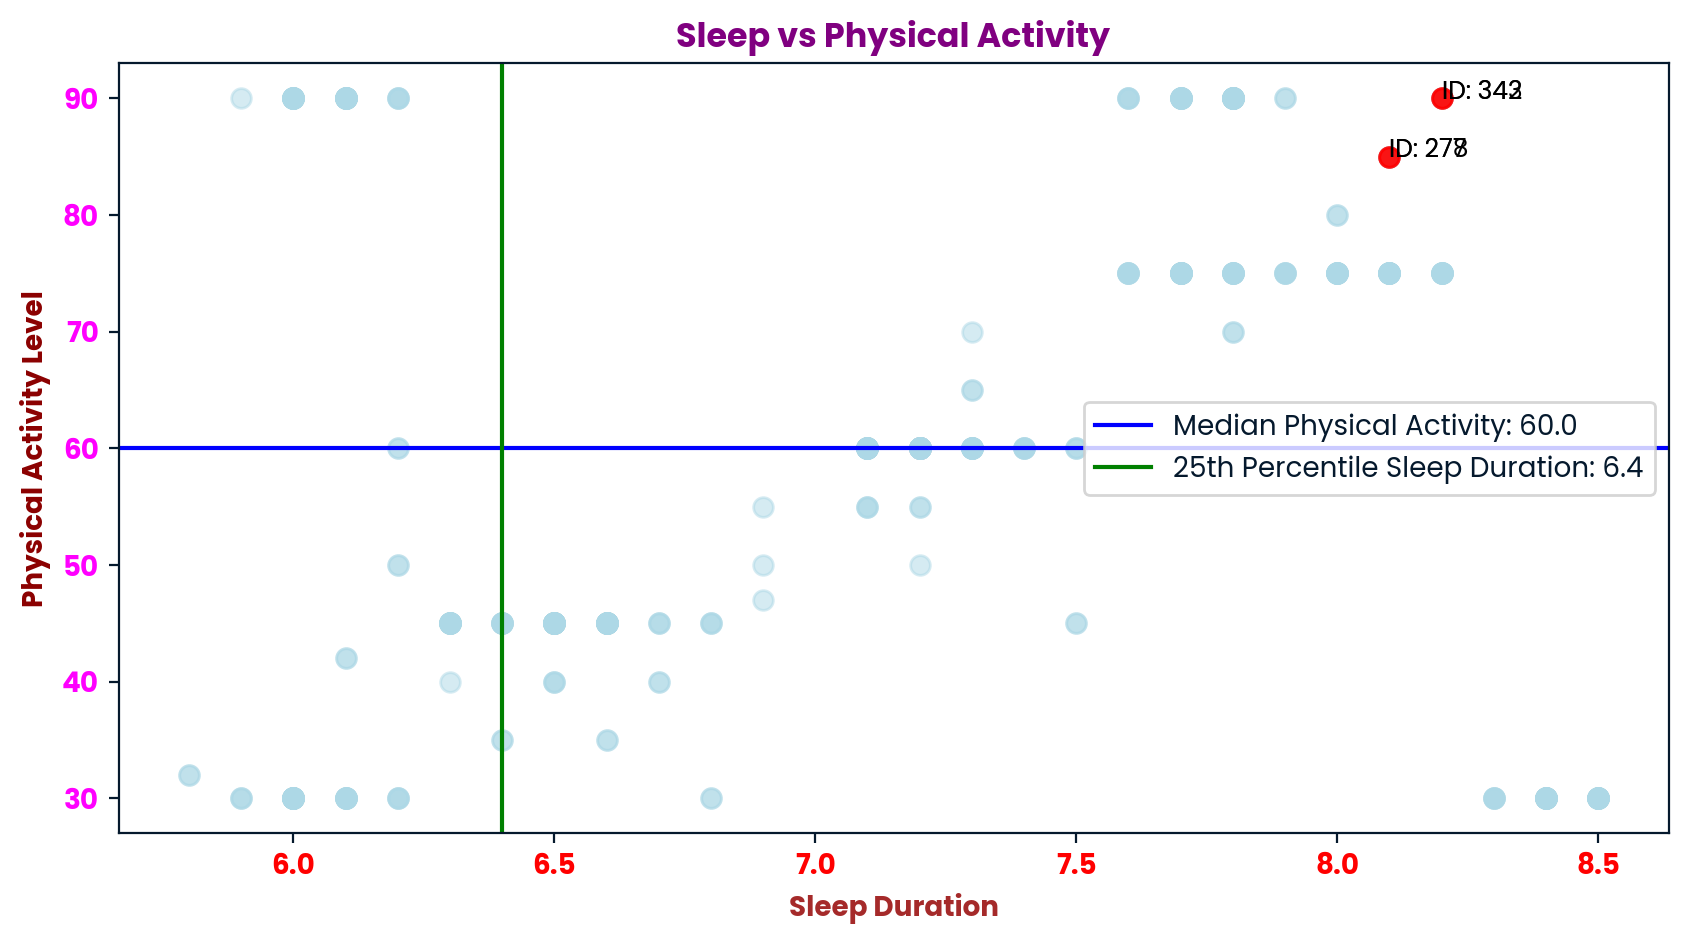

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.gca().set_facecolor("white")

# Scatter plot with default points
plt.scatter(data['Sleep Duration'], data['Physical Activity Level'], 
            color="lightblue", marker="o", alpha=0.5, s=50)

# giving title to the plot
plt.title("Sleep vs Physical Activity", fontweight="bold", color="purple")

# giving X and Y labels
plt.xlabel("Sleep Duration", fontweight="bold", color="brown")
plt.ylabel("Physical Activity Level", fontweight="bold", color="darkred")

# Modifying the ticks
plt.xticks(rotation=0, color="red", fontweight="bold")
plt.yticks(color="magenta", fontweight="bold")

# Adding lines
median_physical_activity = data["Physical Activity Level"].median()
quantile_sleep_duration = data["Sleep Duration"].quantile(0.25)

plt.axhline(y=median_physical_activity, color='b', linestyle='-', label=f'Median Physical Activity: {median_physical_activity}')
plt.axvline(x=quantile_sleep_duration, color='g', linestyle='-', label=f'25th Percentile Sleep Duration: {quantile_sleep_duration}')

# Highlight points where sleep duration is above 8 and physical activity level is 80 plus
highlight = data[(data['Sleep Duration'] > 8) & (data['Physical Activity Level'] > 80)]
plt.scatter(highlight['Sleep Duration'], highlight['Physical Activity Level'], 
            color="red", marker="o", alpha=0.7, s=50)

# Adding labels to highlighted points
for i in range(len(highlight)):
    plt.text(highlight['Sleep Duration'].iloc[i], highlight['Physical Activity Level'].iloc[i], 
             f"ID: {highlight['Person ID'].iloc[i]}", fontsize=9, color='black')

# Adding legend
plt.legend()

# visualizing the plot
plt.show()